# Machine Learning e Imágenes en Python

## Actividad 3

### Mejora de Imagen e Histograma

Cargar en la notebook utilizando la librería OpenCV una imagen de manera monocroma y luego:

* Oscurecer la imagen y almacenarla en otra nueva variable.
* Aclarar la imagen y almacenarla en otra nueva variable.
* Aumentar el contraste de la imagen utilizando la ecualización del histograma.
* Mostrar los 4 histogramas de la imagen y explicar brevemente la naturaleza de cada uno.

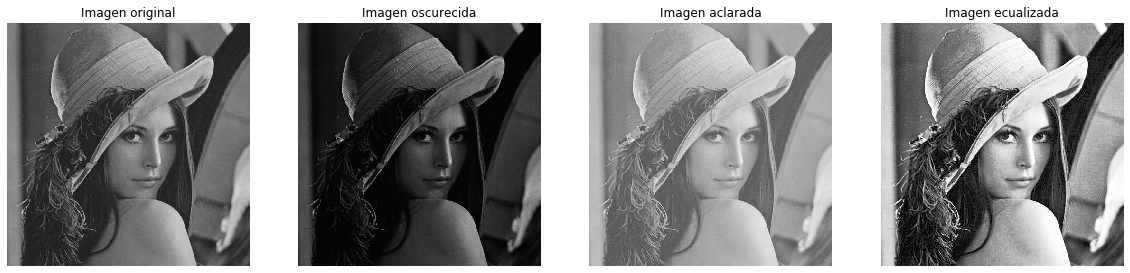

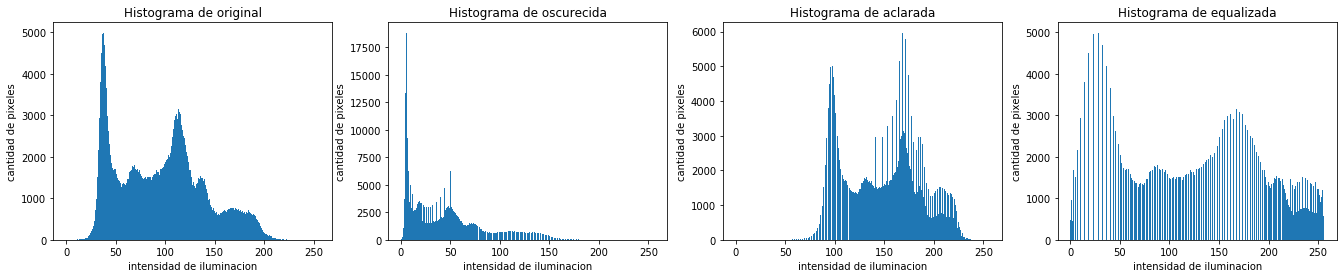

- En el histograma de la imagen oscurecida podemos notar que el mismo posee altos valores en el extremo izquierdo de la escala. Esto quiere decir que la imagen está saturada y a su vez es oscura.
- En el histograma de la imagen aclarada podemos notar que está corrido a la derecha con respecto al de la imagen original, ya que la misma fue aclarada. A su vez, se puede notar que la imagen tiene poco contraste ya que el rango del histograma no es muy grande.
- En el histograma de la imagen ecualizada podemos notar que la misma tiene mucho contraste ya que el rango del histograma es muy amplio.


In [92]:
import cv2
import matplotlib.pyplot as plt

def ajuste_gamma(imagen,gamma):
    imagenresultado=255*((imagen/255)**gamma)
    imagenresultado=imagenresultado.astype('uint8')
    return imagenresultado

img = cv2.imread('lenna.jpg',0)

oscura=ajuste_gamma(img,2) #Se oscurece la imagen
clara=ajuste_gamma(img,0.5) #Se aclara la imagen
img_equalizada = cv2.equalizeHist(img) #Se realiza una ecualización del histograma

fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(20)

axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(oscura, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen oscurecida')
axs[1].axis('off')
axs[2].imshow(clara, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen aclarada')
axs[2].axis('off')
axs[3].imshow(img_equalizada, cmap='gray',vmin=0 ,vmax=255)
axs[3].set_title('Imagen ecualizada')
axs[3].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(23)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de original')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(oscura[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de oscurecida')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].hist(clara[:,:].ravel(), 256,[0,256] ) 
axs[2].set_title('Histograma de aclarada')
axs[2].set_xlabel('intensidad de iluminacion')
axs[2].set_ylabel('cantidad de pixeles')
axs[3].hist(img_equalizada[:,:].ravel(), 256,[0,256] ) 
axs[3].set_title('Histograma de equalizada')
axs[3].set_xlabel('intensidad de iluminacion')
axs[3].set_ylabel('cantidad de pixeles')
plt.show()

print("- En el histograma de la imagen oscurecida podemos notar que el mismo posee altos valores en el extremo izquierdo de la escala. Esto quiere decir que la imagen está saturada y a su vez es oscura.")
print("- En el histograma de la imagen aclarada podemos notar que está corrido a la derecha con respecto al de la imagen original, ya que la misma fue aclarada. A su vez, se puede notar que la imagen tiene poco contraste ya que el rango del histograma no es muy grande.")
print("- En el histograma de la imagen ecualizada podemos notar que la misma tiene mucho contraste ya que el rango del histograma es muy amplio.")

### Transformaciones

Cargue una imagen de a elección y realice lo siguiente:

* Cambie la escala de la imagen cargada por una que sea mayor, y luego por una que sea menor. Almacene las imágenes en nuevas variables, muéstrelas e imprima sus dimensiones con el atributo ".shape".
* Rote la imagen utilizando los ángulos 30, 45 y 90. Almacene y muestre las nuevas imágenes rotadas. ¿Sufrieron algún cambio los píxeles de alguna de las imágenes? ¿Por qué?

In [91]:
import cv2
import numpy as np

imagen=cv2.imread('lenna.jpg') #tipo array
imagengrande=cv2.resize(imagen,(700,700))
imagenchica=cv2.resize(imagen,(200,200))

print("El tamaño de la imagen original es:",imagen.shape)
print("El tamaño de la imagen agrandada es:",imagengrande.shape)
print("El tamaño de la imagen achicada es:",imagenchica.shape)

(h, w) = imagen.shape[:2]
center = (w / 2, h / 2)
scale = 1
M = cv2.getRotationMatrix2D(center, 30, scale)
N = cv2.getRotationMatrix2D(center, 45, scale)
O = cv2.getRotationMatrix2D(center, 90, scale)
rotated30 = cv2.warpAffine(imagen, M, (h, w))
rotated45 = cv2.warpAffine(imagen, N, (h, w))
rotated90 = cv2.warpAffine(imagen, O, (h, w))

cv2.imshow('Imagen original, pulse tecla para continuar',imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('Imagen agrandada, pulse tecla para continuar',imagengrande)
cv2.waitKey(0)
cv2.imwrite("Grande.jpg",imagengrande)
cv2.destroyAllWindows()
cv2.imshow('Imagen achicada, pulse tecla para continuar',imagenchica)
cv2.waitKey(0)
cv2.imwrite("Chica.jpg",imagenchica)
cv2.destroyAllWindows()
cv2.imshow('Imagen rotada 30 grados, pulse tecla para continuar',rotated30)
cv2.waitKey(0)
cv2.imwrite("Rotated30.jpg",imagengrande)
cv2.destroyAllWindows()
cv2.imshow('Imagen rotada 45 grados, pulse tecla para continuar',rotated45)
cv2.waitKey(0)
cv2.imwrite("Rotated45.jpg",imagengrande)
cv2.destroyAllWindows()
cv2.imshow('Imagen rotada 90 grados, pulse tecla para continuar',rotated90)
cv2.waitKey(0)
cv2.imwrite("Rotated90.jpg",imagengrande)
cv2.destroyAllWindows()

print("")
print("Al rotarse la imagen los pixeles cambian de ubicación, se realiza un método de interpolación y en la imagen resultante se rellenan regiones con ceros (0). A su vez, la imagen mantiene el tamaño, lo que genera un recorte de las esquinas. Para que esto no suceda, habría que ampliar la matriz con mayor cantidad de filas y columnas.")

El tamaño de la imagen original es: (512, 512, 3)
El tamaño de la imagen agrandada es: (700, 700, 3)
El tamaño de la imagen achicada es: (200, 200, 3)

Al rotarse la imagen los pixeles cambian de ubicación, se realiza un método de interpolación y en la imagen resultante se rellenan regiones con ceros (0). A su vez, la imagen mantiene el tamaño, lo que genera un recorte de las esquinas. Para que esto no suceda, habría que ampliar la matriz con mayor cantidad de filas y columnas.


### Filtros

Cargue una imagen a elección y realice lo siguiente:

* Aplíquele un filtro gaussiano utilizando la librería OpenCV y muestre la imagen filtrada. Explique lo que sucede al aplicar dicho filtro.

* Aplíquele un filtro Sobel utilizando la librería OpenCV y muestre la imagen filtrada. Explique brevemente lo que sucede al aplicar dicho filtro. Muestre los bordes horizontales y verticales, por separado, de la imagen aplicándole previamente el valor absoluto. ¿Cuál sería la diferencia si deseo utilizar un filtro de Laplace en lugar de Sobel?

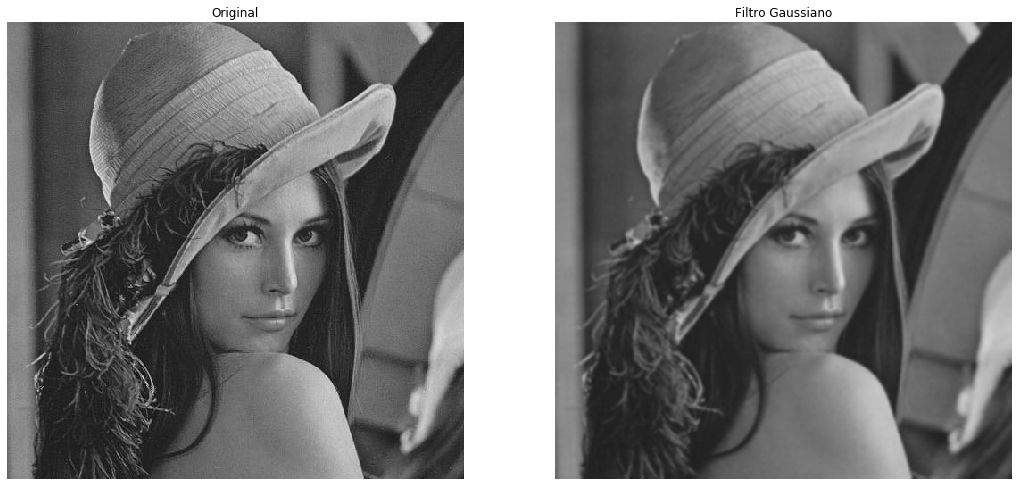

Al aplicar dicho filtro se logra un suavizado más uniforme que el de la media en la imagen original, mediante la utilización de la función 'GaussianBlur'. Los valores del kernel se toman con una distribución gaussiana, es decir que se acomodan los pesos de la máscara de manera que los pixels vecinos centrales tienen más peso y los lejanos menos. Luego, como en todo filtro lineal, se hace una multiplicación lugar a lugar y se realiza la suma. Así es que la máscara va recorriendo la imágen reduciendo las variaciones de intensidad de la misma.


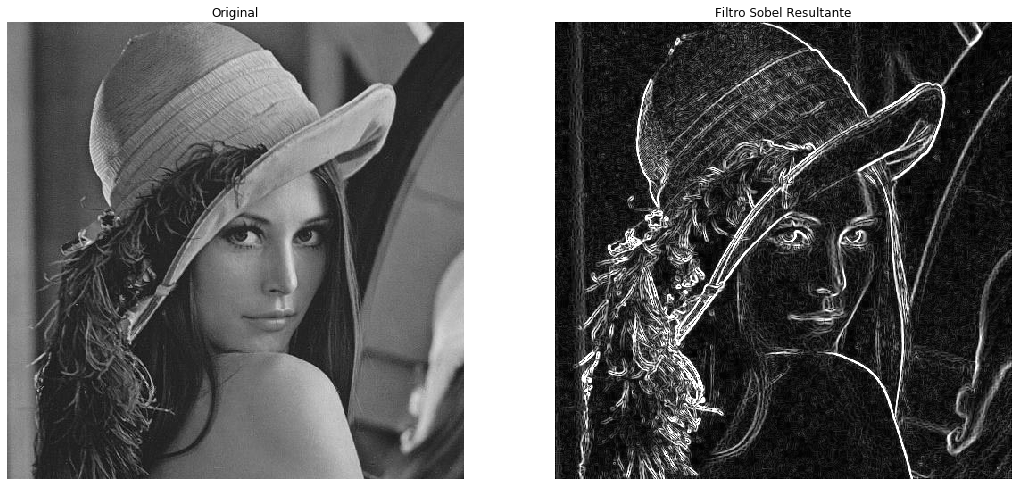

El filtro Sobel lo utilizamos para detectar los bordes de la imagen mediante un cálculo basado en la derivación, ya que un píxel pertenece a un borde si se produce un cambio brusco entre niveles de grises con sus vecinos. Calculamos entonces el gradiente de la intensidad de la imagen en cada píxel y en ambas dimensiones, x e y. Luego, se calcula la resultante de ambos. Así, para cada punto, tenemos la magnitud de variación.


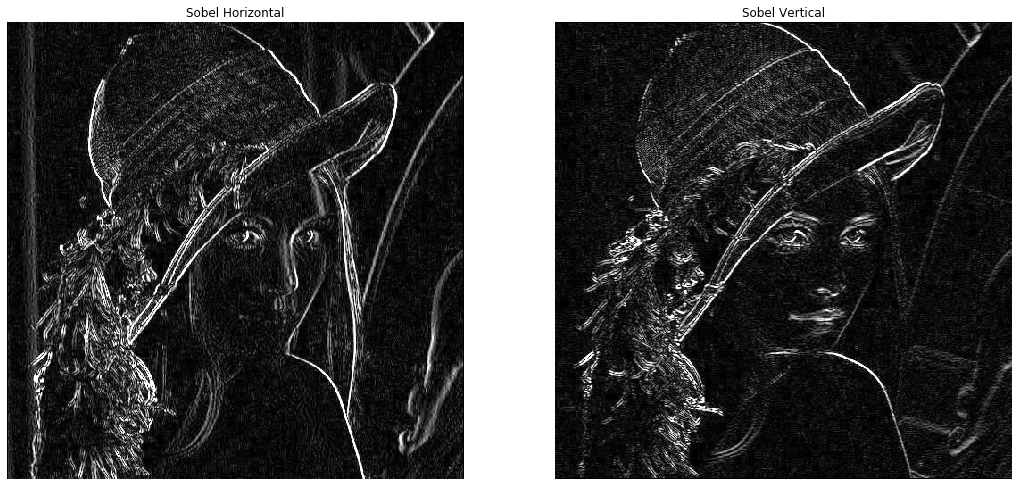

El filtro de Laplace se basa en diferencias finitas de segundo orden y a diferencia del anterior utiliza un sólo kernel para detectar los bordes tanto en el eje x como en el eje y. Graficamente, en lugar de marcarme exáctamente los bordes (como el filtro Sobel), me marca las transiciones hacia los mismos.


In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.jpg',0)
n=7
blur = cv2.GaussianBlur(img,(n,n),0) #Filtro Gaussiano

sobelx = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0, ksize = 3) #Filtro Sobel x
sobely = cv2.Sobel(img, cv2.CV_64F, dx = 0, dy = 1, ksize = 3) #Filtro Sobel y

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)

axs[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(blur,cmap='gray',vmin=0,vmax=255)
axs[1].set_title('Filtro Gaussiano')
axs[1].axis('off')

plt.show()

print("Al aplicar dicho filtro se logra un suavizado más uniforme que el de la media en la imagen original, mediante la utilización de la función 'GaussianBlur'. Los valores del kernel se toman con una distribución gaussiana, es decir que se acomodan los pesos de la máscara de manera que los pixels vecinos centrales tienen más peso y los lejanos menos. Luego, como en todo filtro lineal, se hace una multiplicación lugar a lugar y se realiza la suma. Así es que la máscara va recorriendo la imágen reduciendo las variaciones de intensidad de la misma.")

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)

axs[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(np.sqrt(sobelx ** 2 + sobely ** 2), cmap = 'gray', vmin = 0, vmax = 255) #Filtro Sobel Resultante
axs[1].set_title('Filtro Sobel Resultante')
axs[1].axis('off')

plt.show()

print("El filtro Sobel lo utilizamos para detectar los bordes de la imagen mediante un cálculo basado en la derivación, ya que un píxel pertenece a un borde si se produce un cambio brusco entre niveles de grises con sus vecinos. Calculamos entonces el gradiente de la intensidad de la imagen en cada píxel y en ambas dimensiones, x e y. Luego, se calcula la resultante de ambos. Así, para cada punto, tenemos la magnitud de variación.")

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)

axs[0].imshow(abs(sobelx), cmap = 'gray', vmin = 0, vmax = 255) #Absoluto Sobel x
axs[0].set_title('Sobel Horizontal')
axs[0].axis('off')
axs[1].imshow(abs(sobely), cmap = 'gray', vmin = 0,vmax = 255) #Absoluto Sobel y
axs[1].set_title('Sobel Vertical')
axs[1].axis('off')

plt.show()

print("El filtro de Laplace se basa en diferencias finitas de segundo orden y a diferencia del anterior utiliza un sólo kernel para detectar los bordes tanto en el eje x como en el eje y. Graficamente, en lugar de marcarme exáctamente los bordes (como el filtro Sobel), me marca las transiciones hacia los mismos.")